In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Our objective is to predict the house prices based on their quare footage and the number of bedrooms and bathrooms.



From data_description.txt



SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

LotArea: Lot size in square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

BedroomAbvGr: Number of bedrooms above basement level

In [4]:
data=df[['LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice']]
data.head()

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,1,0,2,1,3,208500
1,9600,0,1,2,0,3,181500
2,11250,1,0,2,1,3,223500
3,9550,1,0,1,0,3,140000
4,14260,1,0,2,1,4,250000


In [5]:
data.isna().sum()

LotArea         0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

In [6]:
dup=pd.DataFrame()
duplicates=dup[data.duplicated()]
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


C:\Users\shemi\AppData\Local\Temp\ipykernel_18868\3491919704.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates=dup[data.duplicated()]


In [7]:
target=data.SalePrice
input=data.drop('SalePrice',axis=1)


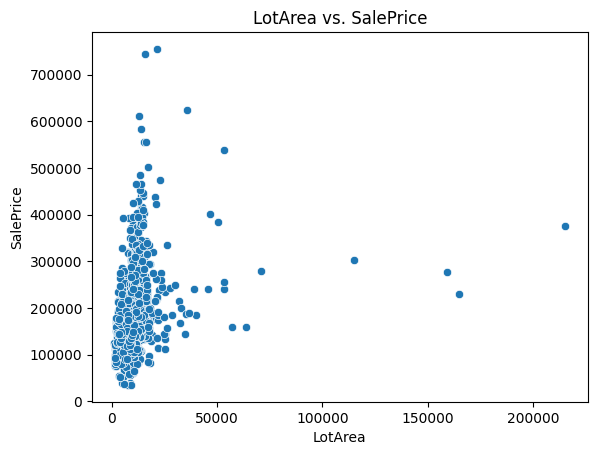

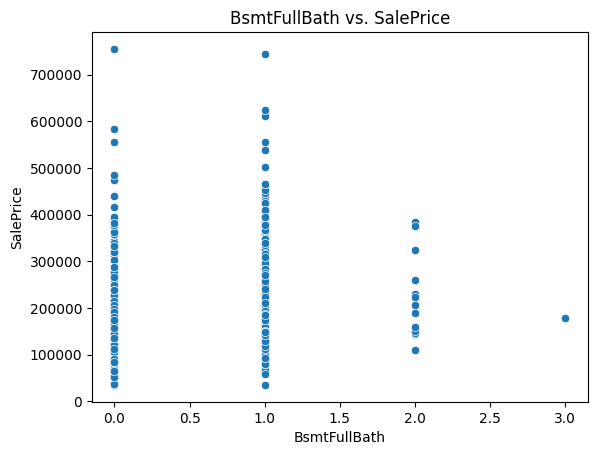

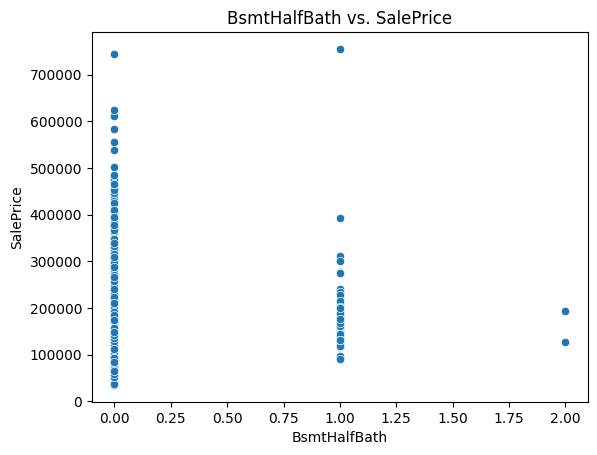

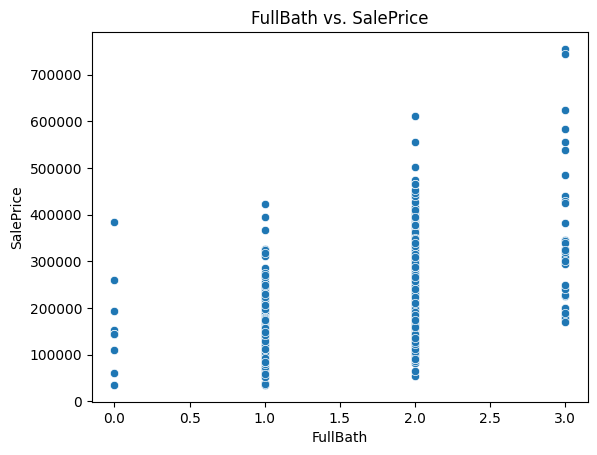

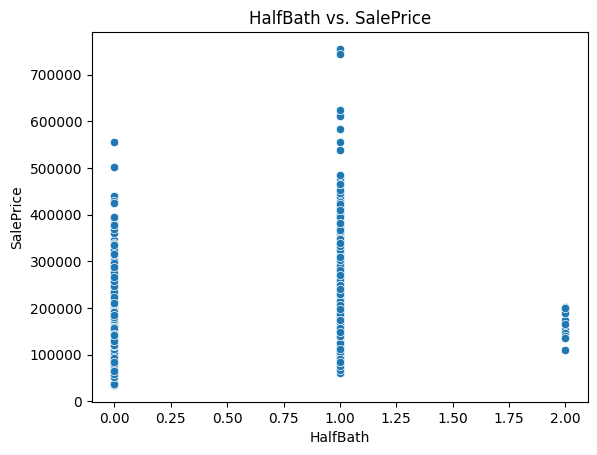

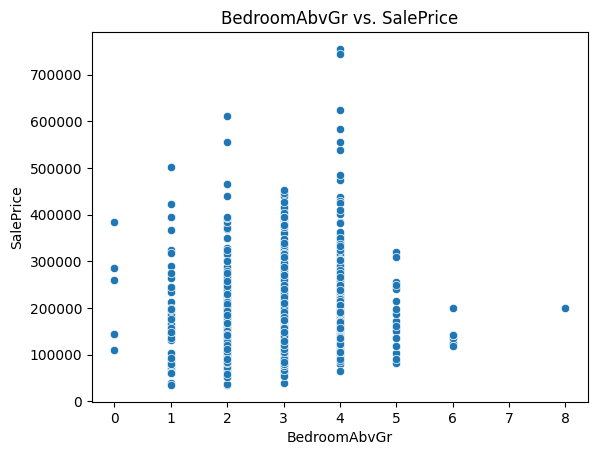

In [8]:
# Iterate through each column in input_data and plot against target
for column in input.columns:
    sns.scatterplot(x=input[column], y=target)
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(f'{column} vs. SalePrice')
    plt.show()


In [9]:
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.2)


In [10]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3641040599738973

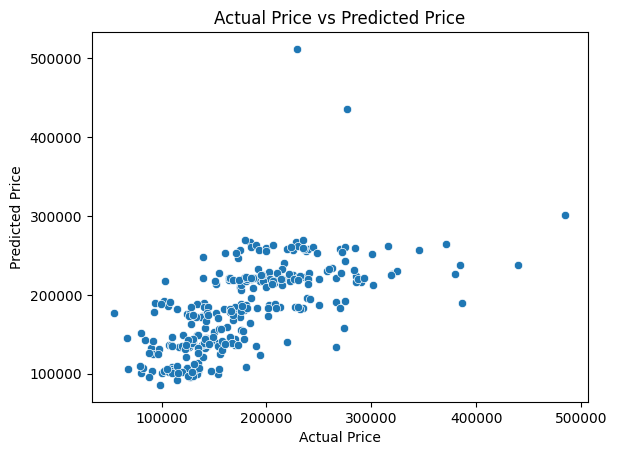

In [11]:
sns.scatterplot(x=y_test,y=model.predict(x_test))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [12]:
test=pd.read_csv('test.csv')
test_data=pd.read_csv('test.csv')

In [13]:
# Identify columns to drop
columns_to_drop = []
for col in test_data.columns:
    if col not in input.columns:
        columns_to_drop.append(col)

# Drop columns
test_data.drop(columns=columns_to_drop, inplace=True)


In [14]:
test_data.head()

,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
0,11622,0.0,0.0,1,0,2
1,14267,0.0,0.0,1,1,3
2,13830,0.0,0.0,2,1,3
3,9978,0.0,0.0,2,1,3
4,5005,0.0,0.0,2,0,2


In [15]:
test_data.isna().sum()

LotArea         0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [16]:
test_data.fillna(0,inplace=True)

In [17]:
predicted_data=test
predicted_data['pred_price']=model.predict(test_data)
predicted_data[['Id','pred_price']]

,Id,pred_price
0,1461,112764.656454
1,1462,145469.505809
2,1463,227115.867940
3,1464,220845.558652
4,1465,184351.176580
...,...,...
1454,2915,125397.028177
1455,2916,125328.660319
1456,2917,148777.586420
1457,2918,119774.688534
